In [ ]:
pip skfuzzy

ERROR: unknown command "skfuzzy"


In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5cb5f2bfd7f0f92461abed30afa4efc5c4c8e7516ff483ef1a84fbc3c4f8f1f7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


21.144736842105264


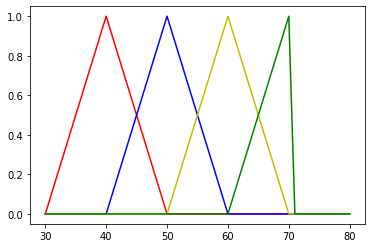

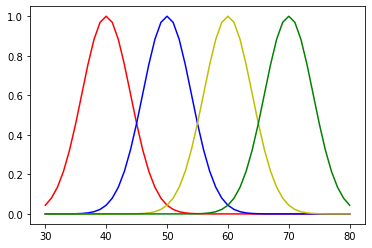

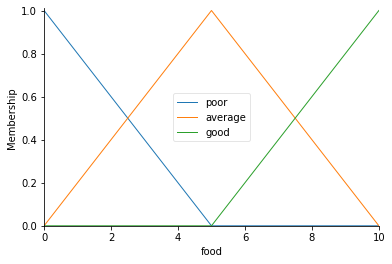

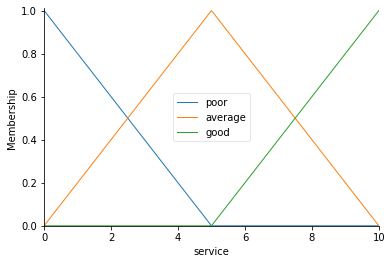

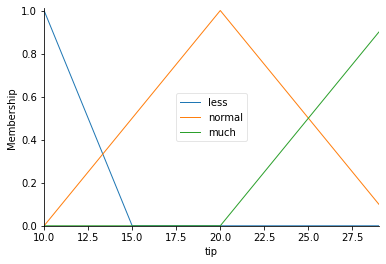

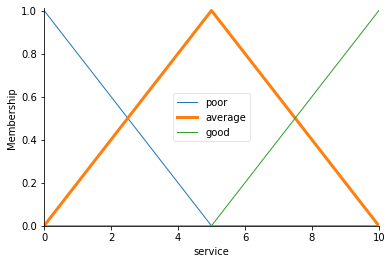

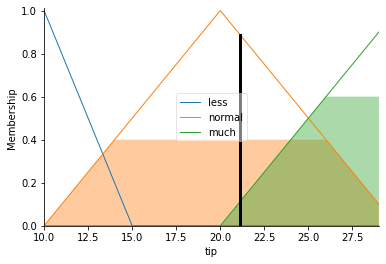

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,81,1)
slow = fuzz.trimf(x,[30,40,50])
medium = fuzz.trimf(x,[40,50,60])
medium_fast = fuzz.trimf(x,[50,60,70])
full_speed = fuzz.trimf(x,[60,70,70])

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5,label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5,label = 'Medium_Fast')
plt.plot(x,full_speed,'g',linewidth = 1.5,label = 'Full_Speed')

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,81,1)
slow = fuzz.gaussmf(x,40,4)
medium = fuzz.gaussmf(x,50,4)
medium_fast = fuzz.gaussmf(x,60,4)
full_speed = fuzz.gaussmf(x,70,4)

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5,label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5,label = 'Medium_Fast')
plt.plot(x,full_speed,'g',linewidth = 1.5,label = 'Full_Speed')

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,30,1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,15])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()
service['average'].view()

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 7
tipping.input['service'] = 8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)




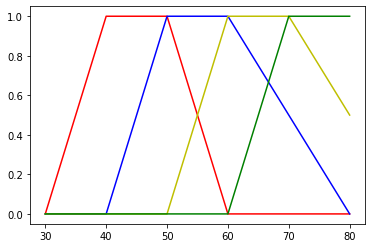

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,81,1)
slow = fuzz.trapmf(x,[30,40,50,60])
medium = fuzz.trapmf(x,[40,50,60,80])
medium_fast = fuzz.trapmf(x,[50,60,70,90])
full_speed = fuzz.trapmf(x,[60,70,80,90])

plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5,label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5,label = 'Medium_Fast')
plt.plot(x,full_speed,'g',linewidth = 1.5,label = 'Full_Speed')

54.56687898089172


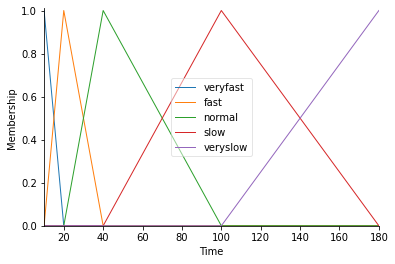

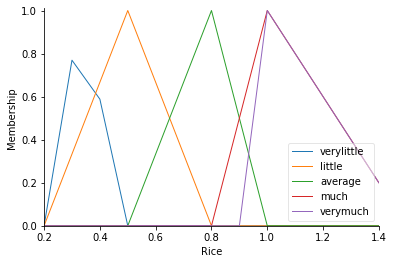

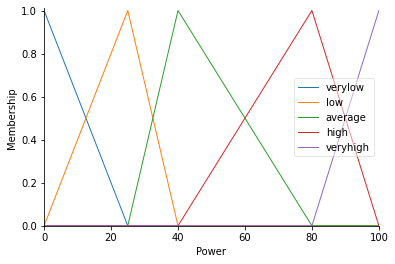

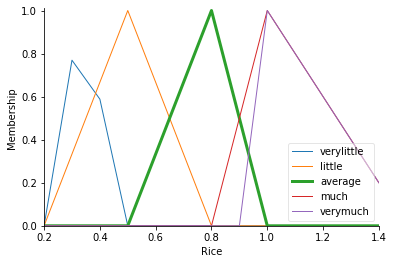

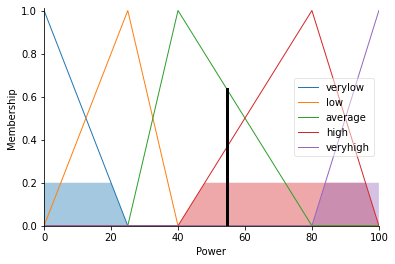

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1),'Time')
rice = ctrl.Antecedent(np.arange(0.2,1.5,0.1),'Rice')
power = ctrl.Consequent(np.arange(0,101,1),'Power')

time['veryfast']= fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe, [10,20,40])                                 
time['normal']= fuzz.trimf(time.universe, [20,40,100])
time['slow']= fuzz.trimf(time.universe, [40,100,180])
time['veryslow']= fuzz.trimf(time.universe, [100,180,180])

rice['verylittle']= fuzz.trimf(rice.universe,[0.2,0.33,0.5])
rice['little'] = fuzz.trimf(rice.universe, [0.2,0.5,0.8])
rice['average']= fuzz.trimf(rice.universe, [0.5,0.8,1])
rice['much']= fuzz.trimf(rice.universe, [0.8,1,1.5])
rice['verymuch']= fuzz.trimf(rice.universe,[1,1,1.5])

power['verylow'] = fuzz.trimf(power.universe, [0,0,25])
power['low'] = fuzz.trimf(power.universe,[0,25,40])
power['average'] = fuzz.trimf(power.universe,[25,40,80])
power['high'] = fuzz.trimf(power.universe,[40,80,100])
power['veryhigh'] = fuzz.trimf(power.universe,[80,100,100])
time.view()
rice.view()
power.view()
rice['average'].view()
rule1 = ctrl.Rule(time['veryfast'] & rice['verylittle'], power['high'])
rule2 = ctrl.Rule(time['veryfast'] & rice['little'], power['high'])
rule3 = ctrl.Rule(time['veryfast'] & rice['average'], power['high'])
rule4 = ctrl.Rule(time['veryfast'] & rice['much'], power['veryhigh'])
rule5 = ctrl.Rule(time['veryfast'] & rice['verymuch'], power['veryhigh'])

rule6 = ctrl.Rule(time['fast'] & rice['verylittle'], power['high'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['veryhigh'])
rule10 = ctrl.Rule(time['fast'] & rice['verymuch'],power['veryhigh'])

rule11 = ctrl.Rule(time['normal'] & rice['verylittle'], power['verylow'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['verymuch'], power['veryhigh'])
                   
rule16 = ctrl.Rule(time['slow'] & rice['verylittle'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['verylow'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['verylow'])
rule20 = ctrl.Rule(time['slow'] & rice['verymuch'], power['verylow'])

rule21 = ctrl.Rule(time['veryslow'] & rice['verylittle'], power['verylow'])
rule22 = ctrl.Rule(time['veryslow'] & rice['little'], power['low'])
rule23 = ctrl.Rule(time['veryslow'] & rice['average'], power['verylow'])
rule24 = ctrl.Rule(time['veryslow'] & rice['much'], power['verylow'])
rule25 = ctrl.Rule(time['veryslow'] & rice['verymuch'], power['verylow'])

cpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
cpower = ctrl.ControlSystemSimulation(cpower_ctrl)
cpower.input['Time'] = 70
cpower.input['Rice'] = 700
cpower.compute()
print(cpower.output['Power'])
power.view(sim = cpower)